**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 22 – Getting started with TensorFlow 2.0 and Keras**

# MLP Classifier with Fashion MNIST Dataset

Nok Wongpiromsarn, 28 October 2020

**Credit:** The large portion of the code has been taken from Chapter 10 of Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

**Download Fashion MNIST using Keras**

In [1]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


**Create the validation set and scale the input features**

In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(y_train[0])

4


**Create the model using the Sequential API**

In [3]:
model = keras.models.Sequential()

# A layer that converts each input image into a 1D array, i.e., outputing x.respae(-1, 1) for any input x
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add a dense layer with 300 neurons, using the ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))

# Add a second Dense hidden layer with 100 neurons, using the ReLU activation function
model.add(keras.layers.Dense(100, activation="relu"))

# Add a Dense output layer with 10 neurons (one per class), using the softmax activation function 
# (because this is multiclass classification)
model.add(keras.layers.Dense(10, activation="softmax"))

# Displays all the model’s layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Access the (initialized) parameters of the first hidden layer

hidden1 = model.get_layer('dense')
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)
print(weights)
print(biases)

(784, 300)
(300,)
[[ 0.01651135 -0.01449697  0.03913572 ... -0.0516869  -0.02899245
   0.02871571]
 [ 0.00350574 -0.05527359  0.02324422 ... -0.011033   -0.06798311
   0.03053969]
 [-0.07065908 -0.06335247 -0.05018945 ... -0.03186733  0.02708189
   0.05775836]
 ...
 [ 0.00166804 -0.02058214 -0.0151151  ... -0.07347941  0.02697261
   0.01646747]
 [-0.00709202  0.06566139 -0.00471708 ...  0.06986353 -0.02370491
  -0.01101468]
 [ 0.0257054  -0.02440019  0.01388855 ...  0.04102127 -0.00380163
   0.02742666]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", 
              metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7094 - accuracy: 0.7636 - val_loss: 0.4960 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 2s 950us/step - loss: 0.4854 - accuracy: 0.8311 - val_loss: 0.4320 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 2s 944us/step - loss: 0.4423 - accuracy: 0.8446 - val_loss: 0.4121 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 2s 931us/step - loss: 0.4140 - accuracy: 0.8546 - val_loss: 0.4118 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 2s 981us/step - loss: 0.3946 - accuracy: 0.8610 - val_loss: 0.3808 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8654 - val_loss: 0.3877 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3674 - accuracy: 0.8680 - val_loss: 0.3671 - val_a

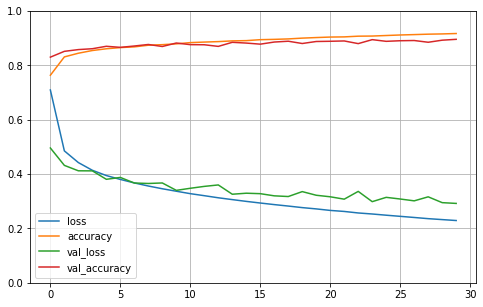

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [8]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 66.9531 - accuracy: 0.8426


[66.95314025878906, 0.8425999879837036]

In [9]:
X_new = X_test[5:10]
y_proba = model.predict(X_new)
y_proba

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [10]:
y_test[5:10]

array([1, 4, 6, 5, 7], dtype=uint8)